In [1]:
import json

import numpy as np
from matplotlib import pyplot as plt

from outcar_parser import Parser
from configuration import Configuration
import calibration

In [2]:
# load the simulation parameters
with open('user_config.json', 'r') as u_conf:
    user_conf = json.load(u_conf)

user_conf['cutoff'] = 5
user_conf['stepsize'] = 1
print(json.dumps(user_conf, indent=4, sort_keys=True))
(nc, ni, lattice_vecs, configurations) = calibration.load_data(user_conf)
V = np.linalg.det(lattice_vecs)

distances = []
for alpha, config in enumerate(configurations):
    config.init_nn(user_conf['cutoff'], lattice_vecs)
    
    distances.append(config.nndistances)


{
    "cutoff": 5,
    "file_in": "OUTCAR.21",
    "file_out": "data",
    "kernel": [
        "gaussian",
        6.25
    ],
    "lambda": 1e-12,
    "nr_modi": 10,
    "stepsize": 1
}


In [3]:
dists = []
for r in distances:
    dists.append(r.flatten())
        
distances = np.array(dists)
distances = distances[distances > 0]

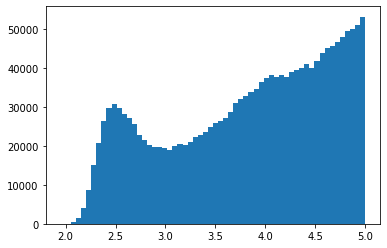

In [4]:
d = plt.hist(distances, bins=60)

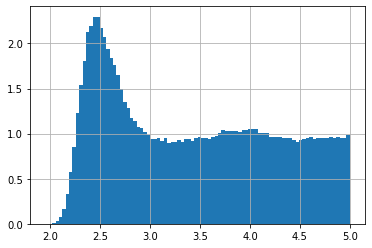

In [5]:
counts, bins = np.histogram(distances, bins=90) 
dr = bins[1]-bins[0]
# density in unitcell
rho = 64 / V 
# divide by uniform particle density
weights = 4 * np.pi * bins[:-1]**2 * dr * rho * 1000 * 64
d = plt.hist(bins[:-1], bins, weights= counts / weights)
plt.grid()